In [5]:
.libPaths("/mnt/home/icb/laura.martens/miniconda3/envs/archr/lib/R/library")
library(Signac)
library(Seurat)
library(anndata)
library(stringr)

Attaching SeuratObject

Attaching sp



In [6]:
setwd('/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/benchmark/trapnell/signac/')

In [7]:
library(Matrix)
library(data.table)

In [8]:
atac <- read_h5ad(paste0('/lustre/groups/ml01/workspace/laura.martens/data/trapnell_sciATAC_fetal_tissue/all_tissues_filtered.h5ad')) 

In [15]:
chrom_assay <- CreateChromatinAssay(
  counts = t(atac$X),
  sep = c("-", "-"),
  genome = 'hg38',
  min.cells = 0,
  min.features = 0,
)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



Attaching package: ‘IRanges’


The fol

In [16]:
atac <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data=atac$obs
)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_”


In [19]:
atac <- RunTFIDF(atac)
atac <- FindTopFeatures(atac, min.cutoff = 'q0')
atac <- RunSVD(atac)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



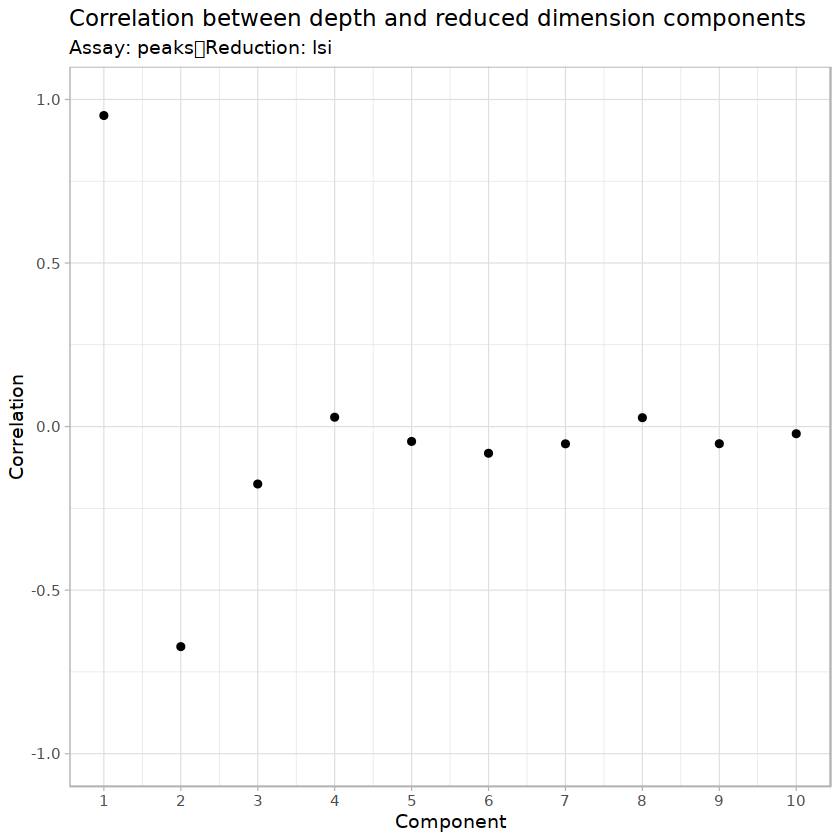

In [20]:
DepthCor(atac)

In [22]:
embedding = Embeddings(atac[['lsi']])[,2:30] #remove first component

In [23]:
write.csv(embedding, file = 'embedding.csv')

In [24]:
atac <- RunUMAP(object = atac, reduction = 'lsi', dims = 2:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:49:59 UMAP embedding parameters a = 0.9922 b = 1.112

16:49:59 Read 720613 rows and found 29 numeric columns

16:49:59 Using Annoy for neighbor search, n_neighbors = 30

16:50:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:51:10 Writing NN index file to temp file /tmp/Rtmp20BXAf/filee46d6bf3d20e

16:51:10 Searching Annoy index using 1 thread, search_k = 3000

16:56:39 Annoy recall = 100%

16:56:40 Commencing smooth kNN distance calibration using 1 thread

16:57:11 Initializing f

In [25]:
p1 <- DimPlot(object = atac, group.by=c("sample_name", "cell_type") )

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



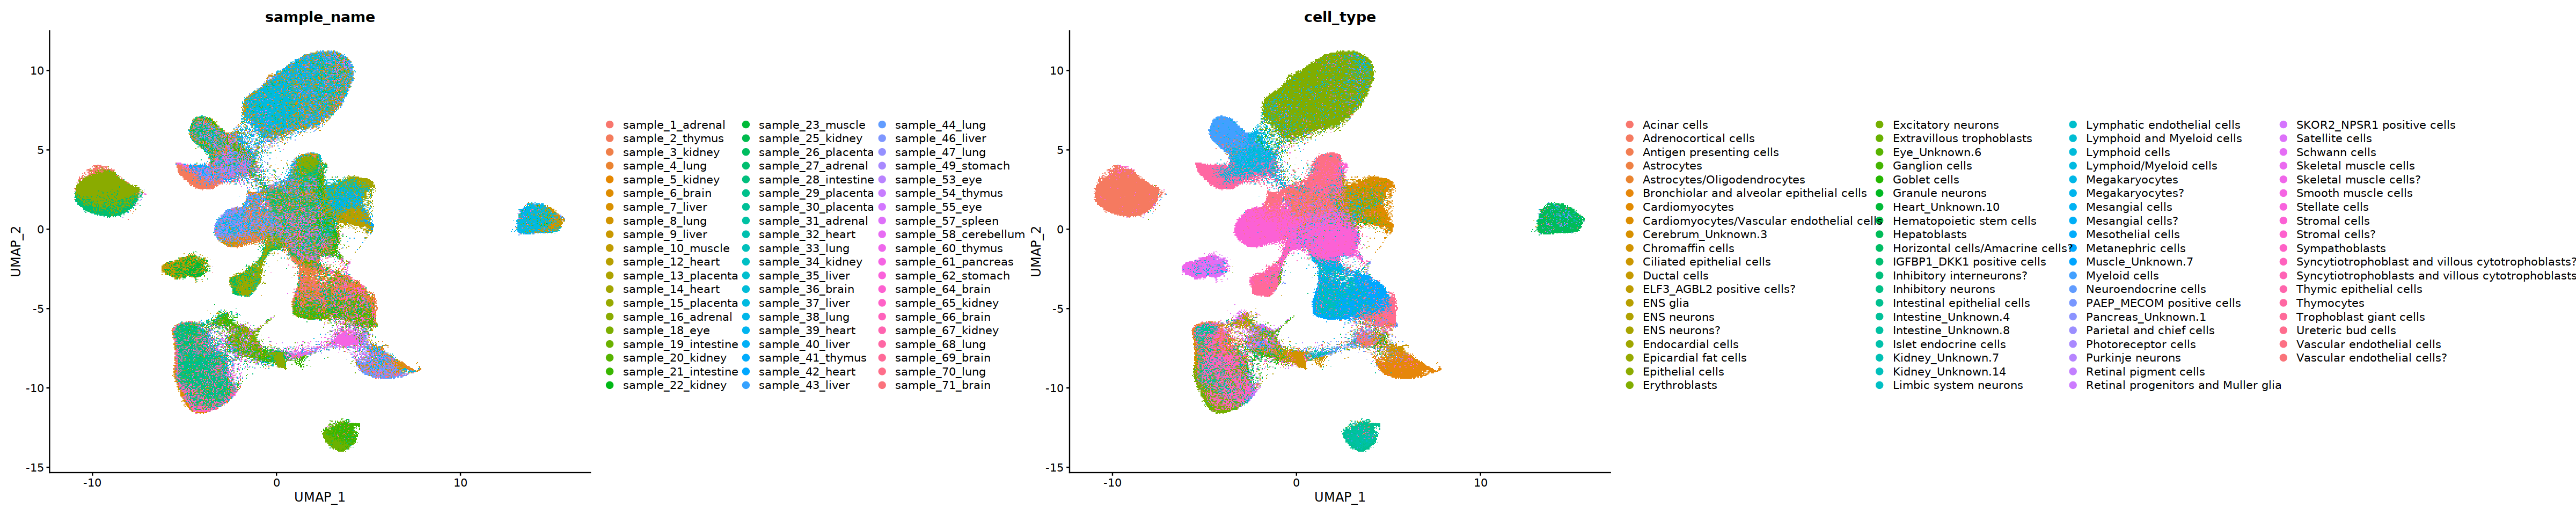

In [27]:
options(repr.plot.width=40, repr.plot.height=8) # figure size
p1

## Run Harmony

In [28]:
library(harmony)

Loading required package: Rcpp



In [29]:
atac <- RunHarmony(
  object = atac,
  group.by.vars = 'sample_name',
  reduction = 'lsi',
  assay.use = 'peaks',
  project.dim = FALSE
)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 36030650)”
Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



In [30]:
embedding = Embeddings(atac[['harmony']])[,2:30] #remove first component

In [31]:
write.csv(embedding, file = 'embedding_harmony.csv')

In [32]:
atac <- RunUMAP(object = atac, reduction = 'harmony', dims = 2:30)

17:36:09 UMAP embedding parameters a = 0.9922 b = 1.112

17:36:10 Read 720613 rows and found 29 numeric columns

17:36:10 Using Annoy for neighbor search, n_neighbors = 30

17:36:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:37:25 Writing NN index file to temp file /tmp/Rtmp20BXAf/filee46d3b2617cc

17:37:25 Searching Annoy index using 1 thread, search_k = 3000

17:43:57 Annoy recall = 100%

17:43:59 Commencing smooth kNN distance calibration using 1 thread

17:44:31 Initializing from normalized Laplacian + noise

17:45:16 Commencing optimization for 200 epochs, with 32253004 positive edges

17:59:49 Optimization finished



In [34]:
p2 <- DimPlot(object = atac, group.by=c("sample_name", "cell_type") ) 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



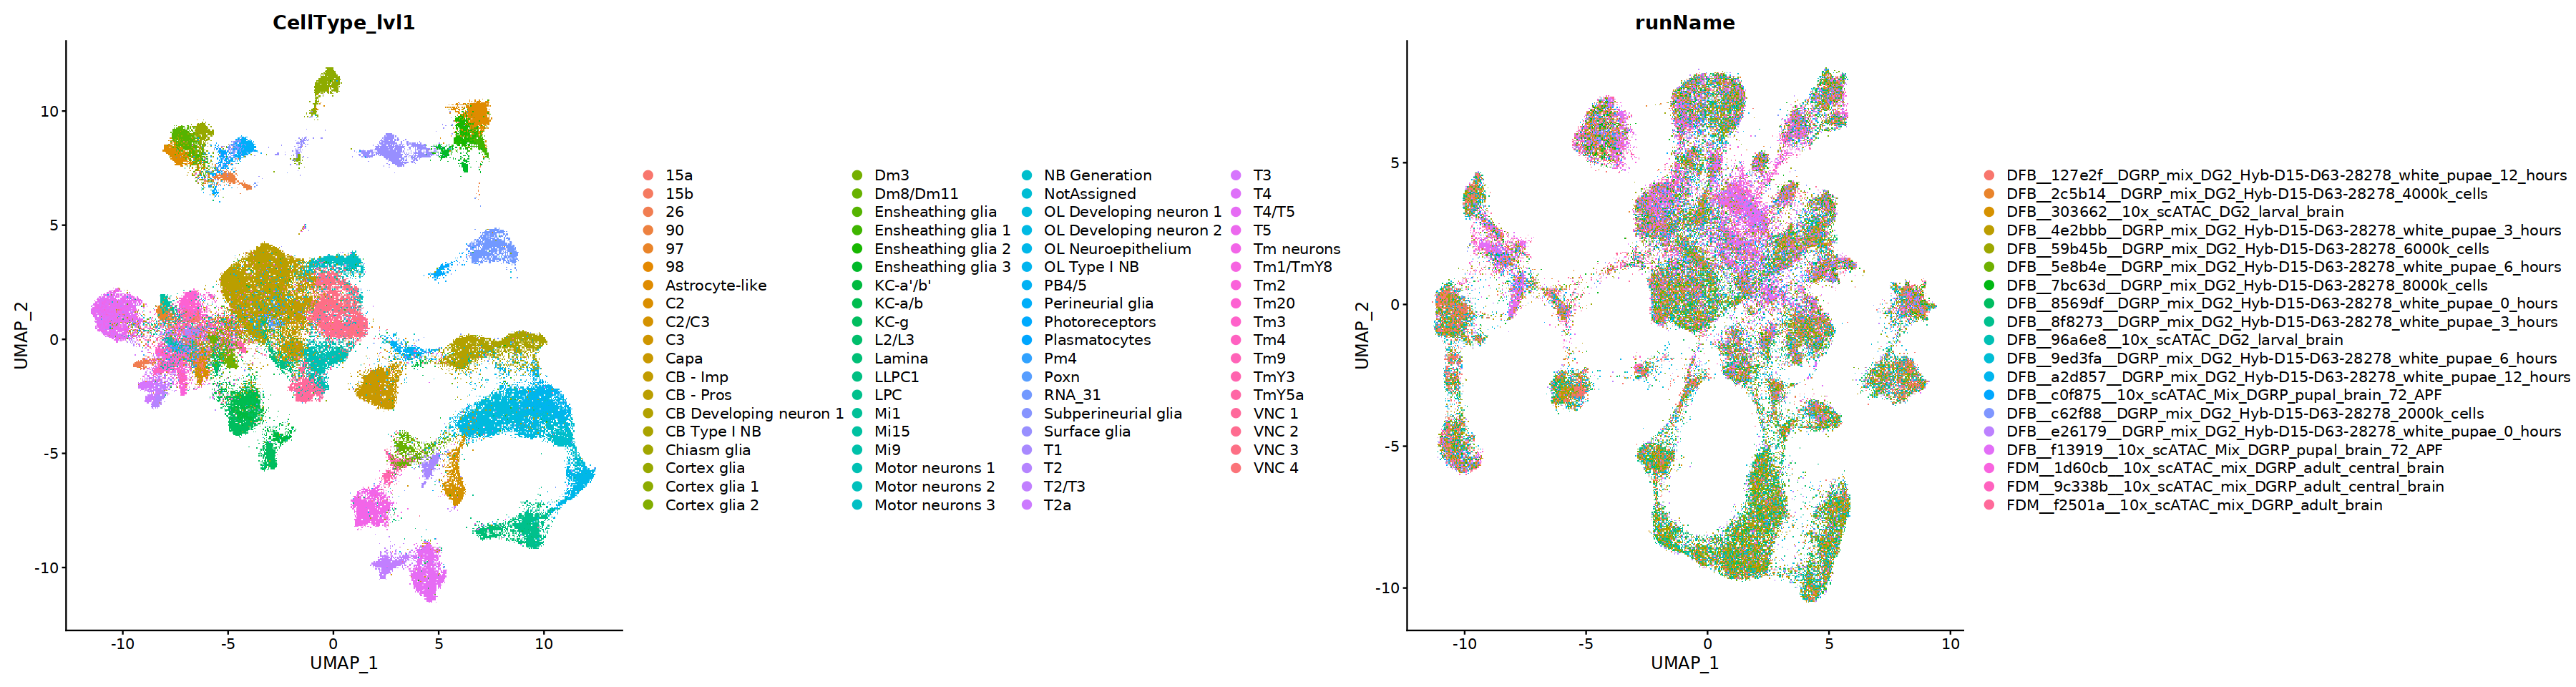

In [182]:
options(repr.plot.width=30, repr.plot.height=8) # figure size
p1 + p2 


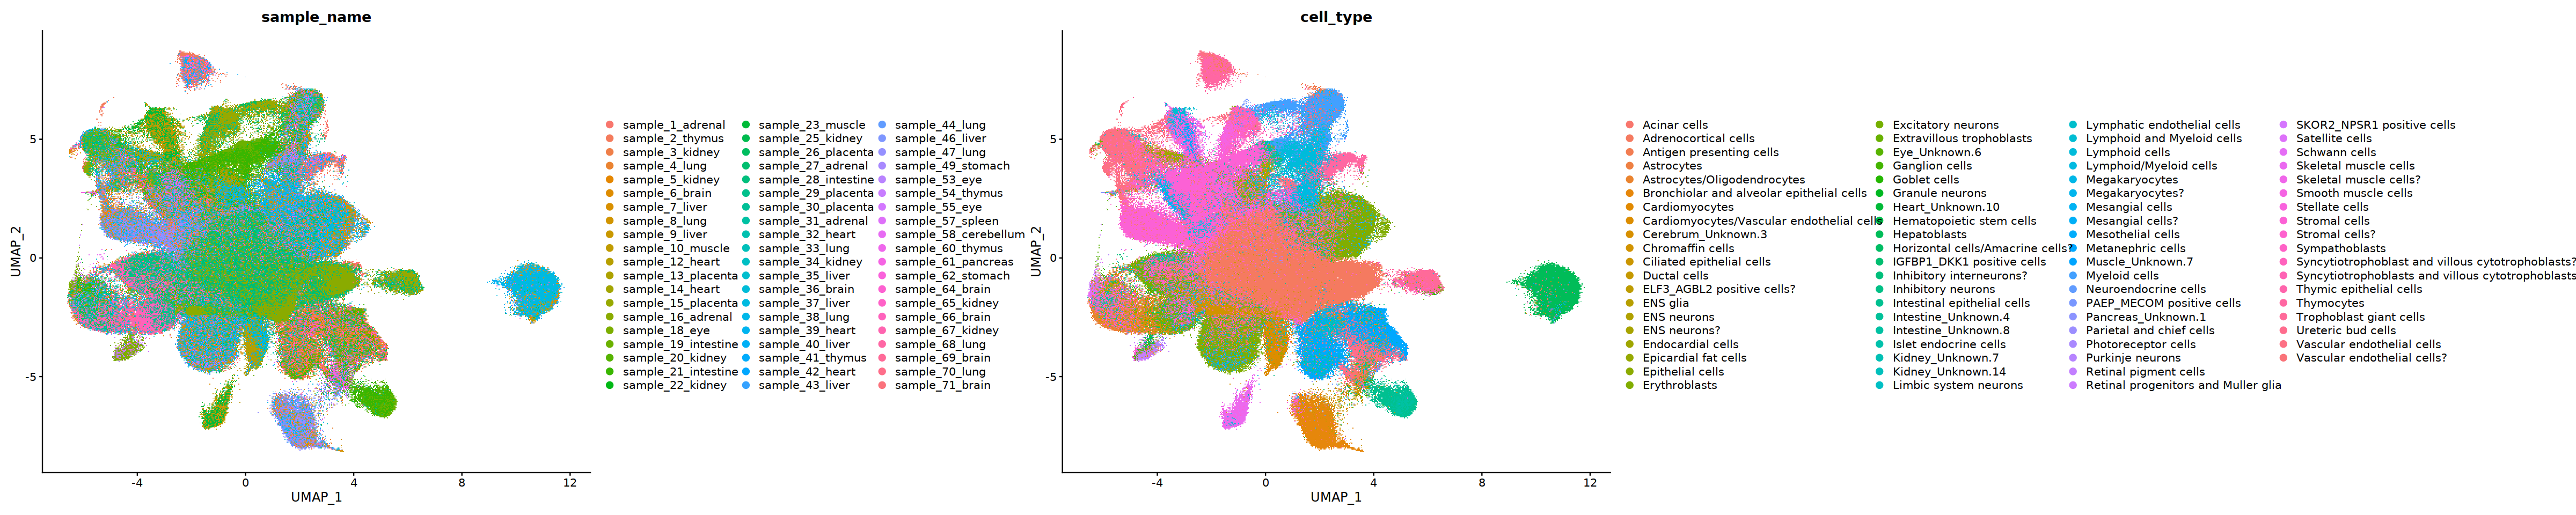

In [ ]:
options(repr.plot.width=40, repr.plot.height=8) 
p2

In [ ]:
2